# Additional Questions Analysis

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import cufflinks as cf
from ipywidgets import interact
import re
import calendar
from matplotlib_venn import venn2, venn2_circles

cf.go_offline()

### Questions to be answered

- Are sightings of Burmese pythons in the wild increasing? (Client wants an analysis with visualizations)
- Which three counties are most affected? (Analysis + visualization)
- Are there geographic hotspots? If so, can you estimate the likelihood that volunteers would find pythons if we sent patrols to those areas between today's date and Dec 31st? (Analysis + viz)
- When are people most likely to spot pythons, and why? (Analysis + viz)
- Are sightings cyclical? (Analysis + viz)
- How many python observations do you predict will be recorded for the full 2019 year? (time-series analysis)
- For purposes of developing a social media/citizen science campaign, the client would like to know:
 - Should we be using iNaturalist to get the public more engaged? (Back your answer with data)
 - Which iNaturalist users are most active in sighting pythons?
 - Which iNaturalist users are most active in identifying pythons? Hint: iNaturalist observations must be confirmed by other users...
 - Which iNaturalist users are most connected in the python-spotting community (i.e. who are the influencers)?
 - Is there overlap between the observers in the two datasets (i.e., are any wildlife officials also using iNaturalist)? (Hint: yes. Visualize it.)

In [364]:
data = pd.read_csv('Python_Gov_Observations_Clean.csv')

In [365]:
data.head(-75)

Reporter      ObsDate  \
0                                   Travis Mangione FWC  24 Nov 2019   
1                                Edward F. Metzger III   20 Nov 2019   
2     Michael Reupert NPS  Big Cypress National Pres...  07 Nov 2019   
3     matthew mccollister National Park Service, Big...  06 Nov 2019   
4     matthew mccollister National Park Service, Big...  05 Nov 2019   
5                   Jeffrey Fobb Miami-Dade Fire Rescue  07 Nov 2019   
6     matthew mccollister National Park Service, Big...  05 Nov 2019   
7                                         Joshua Sands   04 Nov 2019   
8                                       Matthew Bowser   31 Oct 2019   
9     matthew mccollister National Park Service, Big...  31 Oct 2019   
10                                 Christen Mason SFWMD  29 Oct 2019   
11                               Edward F. Metzger III   29 Oct 2019   
12                                      Matthew Bowser   23 Oct 2019   
13                                      Matthew Bowser   23 Oct 2019   
14                                      Matthew Bowser   23 Oct 2019   
15                                      Matthew Bowser   15 Oct 2019   
16                                      Matthew Bowser   15 Oct 2019   
17                                      Matthew Bowser   10 Aug 2019   
18    matthew mccollister National Park Service, Big...  23 Oct 2019   
19                                  Travis Mangione FWC  12 Oct 2019   
20    matthew mccollister National Park Service, Big...  21 Oct 2019   
21                                        Sarah Norris   19 Oct 2019   
22                                       Don Marchetto   15 Oct 2019   
23    Amy Peters South Florida Water Management Dist...  13 Oct 2019   
24                                        Ashley Provo   13 Oct 2019   
25    matthew mccollister National Park Service, Big...  06 Oct 2019   
26    Catherine Gelston Biscayne National Park - Nat...  05 Oct 2019   
27             Vanessa McDonough Biscayne National Park  06 Oct 2019   
28                                       Don Marchetto   02 Oct 2019   
29                                   Amy Siewe None yet  23 May 2019   
30                                   Amy Siewe None yet  13 Jun 2019   
31                                   Amy Siewe None yet  25 Jun 2019   
32                                   Amy Siewe None yet  17 Aug 2019   
33                                   Amy Siewe None yet  17 Aug 2019   
34                                   Amy Siewe None yet  20 Aug 2019   
35                                   Amy Siewe None yet  20 Aug 2019   
36                                   Amy Siewe None yet  02 Oct 2019   
37                                   Amy Siewe None yet  02 Sep 2019   
38                                   Amy Siewe None yet  25 Aug 2019   
39    Leah Miller Florida Bat Conservancy, Fakahatch...  28 Sep 2019   
40    matthew mccollister National Park Service, Big...  13 Aug 2018   
41            Mark Danaher US Fish and Wildlife Service  26 Sep 2019   
42             Vanessa McDonough Biscayne National Park  24 Sep 2019   
43    matthew mccollister National Park Service, Big...  23 Sep 2019   
44                                        Joshua Sands   24 Sep 2019   
45                                        Joey Cabrera   02 Sep 2019   
46                                        Joey Cabrera   06 Sep 2019   
47                                       David Shindle   05 Sep 2019   
48                                  annette johnson nps  23 Aug 2019   
49    matthew mccollister National Park Service, Big...  15 Aug 2019   
50    matthew mccollister National Park Service, Big...  17 Aug 2019   
51    matthew mccollister National Park Service, Big...  17 Aug 2019   
52    matthew mccollister National Park Service, Big...  15 Aug 2019   
53    Jake Travers Florida Fish and Wildlife Conserv...  16 Aug 2019   
54                                        Sarah Norris   15 Jul 2019   
55    matthew m

## Python Community Influencers

In [366]:
combos = (['snakesareprettycool', 'snakesareprettycool'],
 ['snakesareprettycool', 'gibbous'],
 ['snakesareprettycool', 'bobbyfingers'],
 ['wayne_fidler', 'snakesareprettycool'],
 ['wayne_fidler', 'gibbous'],
 ['wayne_fidler', 'dodomae98'],
 ['jdwillson', 'craigv'],
 ['pythonbob', 'snakesareprettycool'],
 ['pythonbob', 'gibbous'],
 ['pythonbob', 'dodomae98'],
 ['jance', 'wayne_fidler'],
 ['jcs13', 'bobbyfingers'],
 ['ulicoyote', 'lucareptile'],
 ['sheriff_woody_pct', 'gibbous'],
 ['jakescott', 'wayne_fidler'],
 ['beck4834', 'mc1991'],
 ['brm85', 'lucareptile'],
 ['ulicoyote', 'eattaway92'],
 ['the_lamp', 'gibbous'],
 ['pythonbob', 'wayne_fidler'],
 ['pythonbob', 'richardwasson'],
 ['joemdo', 'bobbyfingers'],
 ['pythonbob', 'syrherp'],
 ['reptileryan', 'catenatus'],
 ['pythonbob', 'jdwillson'],
 ['pythonbob', 'lucareptile'],
 ['badger8181', 'gibbous'],
 ['literally', 'dodomae98'],
 ['daniel_e', 'pythonbob'],
 ['pythonbob', 'prakrit'],
 ['pythonbob', 'gibbous'],
 ['pythonbob', 'dodomae98'],
 ['pythonbob', 'pythonbob'],
 ['teakh', 'prakrit'],
 ['bmbourassa', 'gibbous'],
 ['mickelviper', 'pythonbob'],
 ['megshrooms', 'mc1991'],
 ['lisnel', 'gibbous'],
 ['mike_rochford', 'dodomae98'],
 ['hunter30', 'jance'],
 ['brendanboyd', 'lucareptile'],
 ['matt447', 'gtsalmon'],
 ['noaboa', 'gibbous'],
 ['andrewblaurock', 'dodomae98'],
 ['snakemanhardy', 'jcs13'],
 ['mike_rochford', 'lucareptile'],
 ['michiko', 'gibbous'],
 ['joemdo', 'dodomae98'],
 ['joemdo', 'ulicoyote'],
 ['david_legros', 'dodomae98'],
 ['jcentavo', 'wolfgang_wuster'],
 ['floridensis', 'petekleinhenz'],
 ['bobbyfingers', 'gibbous'],
 ['bobbyfingers', 'dodomae98'],
 ['wildfigs', 'sheriff_woody_pct'],
 ['alexb0000', 'alexb0000'],
 ['michiko', 'gibbous'],
 ['adambarooster', 'daniel_e'],
 ['atrox77', 'ptexis'],
 ['atrox77', 'lucareptile'],
 ['atrox77', 'dodomae98'],
 ['atrox77', 'daniel_e'],
 ['tpalmer', 'karlszs'],
 ['strongpm', 'gibbous'],
 ['swampgnome', 'jakescott'],
 ['desertmax', 'dodomae98'],
 ['noaboa', 'mc1991'],
 ['joemdo', 'gibbous'],
 ['joemdo', 'beck4834'],
 ['joemdo', 'daniel_e'],
 ['dodomae98', 'daniel_e'],
 ['knitosophy', 'alexb0000'],
 ['michiko', 'brm85'],
 ['plruiz', 'gibbous'],
 ['plruiz', 'dodomae98'],
 ['michiko', 'daniel_e'],
 ['timothy214287', 'gibbous'],
 ['steviekgold', 'ulicoyote'],
 ['dwakefield', 'ptexis'],
 ['nowcolorado', 'daniel_e'],
 ['nowcolorado', 'the_lamp'],
 ['nowcolorado', 'thermoregulator'])

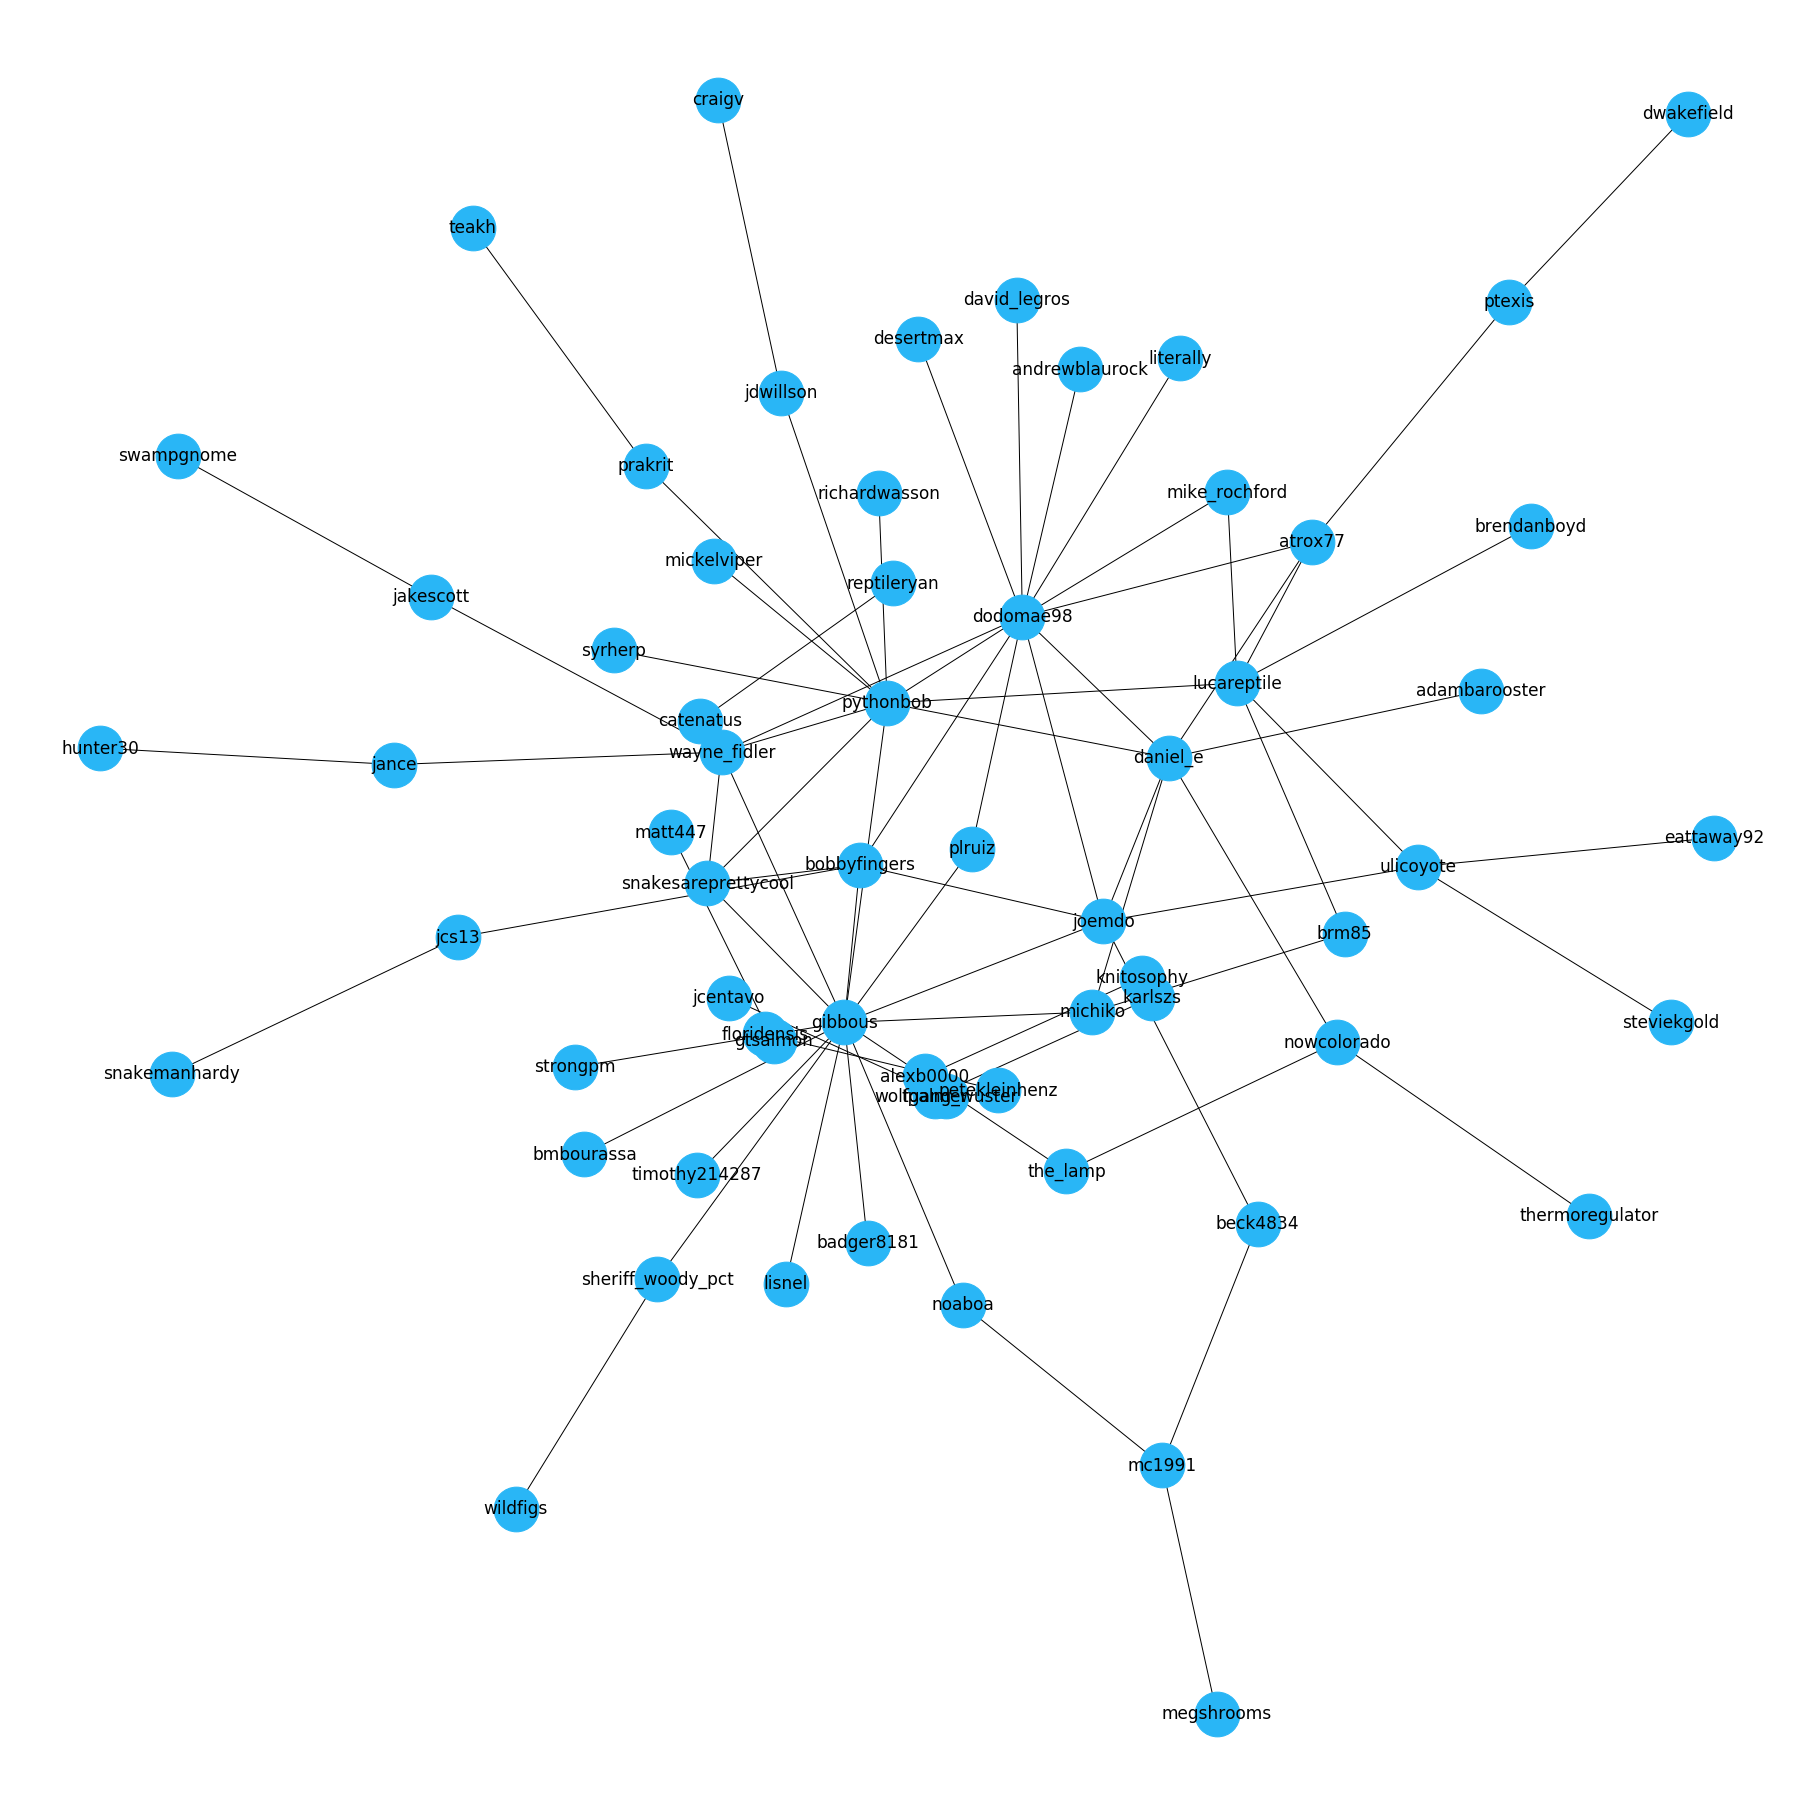

In [367]:
G = nx.Graph()

G.add_edges_from(combos)

# larger figure size
plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,
        with_labels = True,
        node_size = 2000,
        font_size = 17,
        node_color = '#29b6f6'
       
)

In [368]:
#Most influential users

sorted(nx.degree_centrality(G), key=nx.degree_centrality(G).get, reverse = True)[:5]


['gibbous', 'pythonbob', 'dodomae98', 'daniel_e', 'snakesareprettycool']

## Python Spotting 

<strong>When are people most likely to spot pythons, and why?</strong>

In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4795 entries, 0 to 4794
Data columns (total 10 columns):
Reporter      4795 non-null object
ObsDate       4795 non-null object
DateEnt       4795 non-null object
Location      4795 non-null object
Longitude     4795 non-null float64
Latitude      4795 non-null float64
RecOwner      4795 non-null object
First_Name    4795 non-null object
Last_Name     4795 non-null object
County        4795 non-null object
dtypes: float64(2), object(8)
memory usage: 374.7+ KB


In [370]:
data.head()

Reporter      ObsDate  \
0                                Travis Mangione FWC  24 Nov 2019   
1                             Edward F. Metzger III   20 Nov 2019   
2  Michael Reupert NPS  Big Cypress National Pres...  07 Nov 2019   
3  matthew mccollister National Park Service, Big...  06 Nov 2019   
4  matthew mccollister National Park Service, Big...  05 Nov 2019   

       DateEnt                            Location  Longitude  Latitude  \
0  26 Nov 2019  Miami-Dade, Florida, United States  -80.74829  25.76191   
1  22 Nov 2019     Broward, Florida, United States  -80.50567  26.29298   
2  12 Nov 2019     Collier, Florida, United States  -81.10691  25.86434   
3  07 Nov 2019     Collier, Florida, United States  -80.90326  25.83131   
4  07 Nov 2019     Collier, Florida, United States  -81.18223  25.87197   

  RecOwner First_Name    Last_Name      County  
0  Unknown     Travis     Mangione  Miami-Dade  
1  Unknown     Edward      Metzger     Broward  
2  Unknown    Michael      Reupert     Collier  
3  Unknown    Matthew  Mccollister     Collier  
4  Unknown    Matthew  Mccollister     Collier

In [371]:
data['Date_Formatted'] =  pd.to_datetime(data['ObsDate'])

In [372]:
time_data = data[['Date_Formatted', 'First_Name', 'Last_Name']]#.set_index('Date_Formatted')

In [373]:
time_data['Month'] = time_data['Date_Formatted'].apply(lambda x: re.sub('-.*','',re.sub('\d{4}-','',str(x))))
time_data['Year_Month'] = time_data['Date_Formatted'].apply(lambda x: re.sub('-\d{2}$','',str(x)))
time_data['Year'] = time_data['Date_Formatted'].apply(lambda x: re.sub('-.*','',str(x)))

In [374]:
time_data

Date_Formatted   First_Name     Last_Name Month           Year_Month  \
0        2019-11-24       Travis      Mangione    11  2019-11-24 00:00:00   
1        2019-11-20       Edward       Metzger    11  2019-11-20 00:00:00   
2        2019-11-07      Michael       Reupert    11  2019-11-07 00:00:00   
3        2019-11-06      Matthew   Mccollister    11  2019-11-06 00:00:00   
4        2019-11-05      Matthew   Mccollister    11  2019-11-05 00:00:00   
5        2019-11-07      Jeffrey       Metzger    11  2019-11-07 00:00:00   
6        2019-11-05      Matthew   Mccollister    11  2019-11-05 00:00:00   
7        2019-11-04       Joshua         Sands    11  2019-11-04 00:00:00   
8        2019-10-31      Matthew        Bowser    10  2019-10-31 00:00:00   
9        2019-10-31      Matthew   Mccollister    10  2019-10-31 00:00:00   
10       2019-10-29     Christen         Mason    10  2019-10-29 00:00:00   
11       2019-10-29       Edward       Metzger    10  2019-10-29 00:00:00   
12       2019-10-23      Matthew        Bowser    10  2019-10-23 00:00:00   
13       2019-10-23      Matthew        Bowser    10  2019-10-23 00:00:00   
14       2019-10-23      Matthew        Bowser    10  2019-10-23 00:00:00   
15       2019-10-15      Matthew        Bowser    10  2019-10-15 00:00:00   
16       2019-10-15      Matthew        Bowser    10  2019-10-15 00:00:00   
17       2019-08-10      Matthew        Bowser    08  2019-08-10 00:00:00   
18       2019-10-23      Matthew   Mccollister    10  2019-10-23 00:00:00   
19       2019-10-12       Travis      Mangione    10  2019-10-12 00:00:00   
20       2019-10-21      Matthew   Mccollister    10  2019-10-21 00:00:00   
21       2019-10-19        Sarah        Norris    10  2019-10-19 00:00:00   
22       2019-10-15          Don     Marchetto    10  2019-10-15 00:00:00   
23       2019-10-13          Amy        Peters    10  2019-10-13 00:00:00   
24       2019-10-13       Ashley         Provo    10  2019-10-13 00:00:00   
25       2019-10-06      Matthew   Mccollister    10  2019-10-06 00:00:00   
26       2019-10-05    Catherine       Gelston    10  2019-10-05 00:00:00   
27       2019-10-06      Vanessa     Mcdonough    10  2019-10-06 00:00:00   
28       2019-10-02          Don     Marchetto    10  2019-10-02 00:00:00   
29       2019-05-23          Amy         Siewe    05  2019-05-23 00:00:00   
30       2019-06-13          Amy         Siewe    06  2019-06-13 00:00:00   
31       2019-06-25          Amy         Siewe    06  2019-06-25 00:00:00   
32       2019-08-17          Amy         Siewe    08  2019-08-17 00:00:00   
33       2019-08-17          Amy         Siewe    08  2019-08-17 00:00:00   
34       2019-08-20          Amy         Siewe    08  2019-08-20 00:00:00   
35       2019-08-20          Amy         Siewe    08  2019-08-20 00:00:00   
36       2019-10-02          Amy         Siewe    10  2019-10-02 00:00:00   
37       2019-09-02          Amy         Siewe    09  2019-09-02 00:00:00   
38       2019-08-25          Amy         Siewe    08  2019-08-25 00:00:00   
39       2019-09-28         Leah        Miller    09  2019-09-28 00:00:00   
40       2018-08-13      Matthew   Mccollister    08  2018-08-13 00:00:00   
41       2019-09-26         Mark       Danaher    09  2019-09-26 00:00:00   
42       2019-09-24      Vanessa     Mcdonough    09  2019-09-24 00:00:00   
43       2019-09-23      Matthew   Mccollister    09  2019-09-23 00:00:00   
44       2019-09-24       Joshua         Sands    09  2019-09-24 00:00:00   
45       2019-09-02         Joey       Cabrera    09  2019-09-02 00:00:00   
46       2019-09-06         Joey       Cabrera    09  2019-09-06 00:00:00   
47       2019-09-05        David       Shindle    09  2019-09-05 00:00:00   
48       2019-08-23      Annette       Johnson    08  2019-08-23 00:00:00   
49       2019-08-15      Matthew   Mccollister    08  2019-08-15 00:00:00   
50       2019-08-17      Matthew   Mccollister    08  2019-08-17 00:00:00   
5

In [375]:
time_data.groupby('Month')['First_Name'].count().sort_values(ascending = False)

Month
08    675
07    545
01    535
12    483
11    444
10    403
06    350
05    342
09    334
02    239
04    233
03    212
Name: First_Name, dtype: int64

In [376]:
calendar.month_abbr[1]

'Jan'

In [377]:
time_data['Month'] = time_data['Month'].astype(int)

In [378]:
time_data['Month_Name'] = time_data['Month'].apply(lambda x: calendar.month_abbr[x])

In [467]:
time_data['Month_Name'].value_counts().iplot(kind = 'bar', title = 'Python Sitings Aggregated by Month')

In [380]:
SF_Seasons = {'Apr':'Wet_Season',
              'May':'Wet_Season',
              'Jun':'Wet_Season',
              'Jul':'Wet_Season',
              'Aug':'Wet_Season',
              'Sep':'Wet_Season',
              'Oct':'Dry_Season',
              'Nov':'Dry_Season',
              'Dec':'Dry_Season',
              'Jan':'Dry_Season',
              'Feb':'Dry_Season',
              'Mar':'Dry_Season'
             }

#Source: https://www.weather.gov/mfl/summer_season

In [381]:
time_data['SF_Season'] = time_data['Month_Name'].apply(lambda x: SF_Seasons[x])

In [468]:
time_data['SF_Season'].value_counts().iplot(kind = 'bar', title = 'Python Sightings by Season')

In [383]:
AVG_Monthly_Temp_F = {'Apr': 74,
                      'May': 78,
                      'Jun': 82,
                      'Jul': 84,
                      'Aug': 85,
                      'Sep': 84,
                      'Oct': 84,
                      'Nov': 77,
                      'Dec': 73,
                      'Jan': 68,
                      'Feb': 69,
                      'Mar': 71
                         }
#Source: https://www.weather.gov/media/mfl/climate/Miami%20Daily%20Normals%20(1981-2010).pdf

In [384]:
time_data['SF_AVG_Monthly_Temp_F'] = time_data['Month_Name'].apply(lambda x: AVG_Monthly_Temp_F[x])

In [469]:
time_data['SF_AVG_Monthly_Temp_F'].value_counts().iplot(kind = 'bar', title = 'Python Sightings by Temp')

In [470]:
time_data['Temp'] = np.where(
                    time_data['SF_AVG_Monthly_Temp_F'] >= 76,
                    'Warm',
                    'Cold'
)

In [473]:
time_data['Temp'].value_counts().iplot(kind = 'bar', title = 'Python Sightings by Climate')

In [388]:
sorted(AVG_Monthly_Temp_F, key=AVG_Monthly_Temp_F.get, reverse = False)[:5]

['Jan', 'Feb', 'Mar', 'Dec', 'Apr']

<strong>Source: </strong>http://crocdoc.ifas.ufl.edu/publications/factsheets/Burmese%20pythons%20in%20S%20FL_IFAS%20factsheet_final_NPS.pdf

- According to the source above, pythons will hatch between July and August (the 2 hightest months for sightings). This may be indicative that pythons are more often spotted after their eggs hatch and and both mature pythons and hatchlings are spotted. This can be verified with further data on the maturity of the python spotted
- The next preceeding 2 months are 2 of the cooler months in the year, so pythons may be coming out to warm themselves up



## Python Spotting Seasonal

In [475]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

time_data['Month_Name'].value_counts().loc[month_order].iplot(kind = 'bar', title = 'Python Sitings Aggregated by Month')


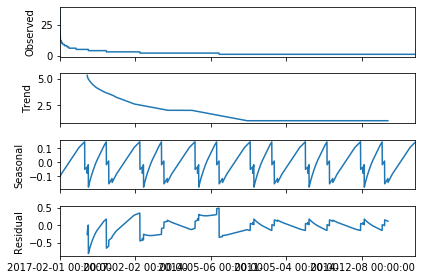

In [465]:
from statsmodels.tsa.seasonal import seasonal_decompose

_ = seasonal_decompose(time_data['Year_Month'].value_counts(), freq = 365).plot()

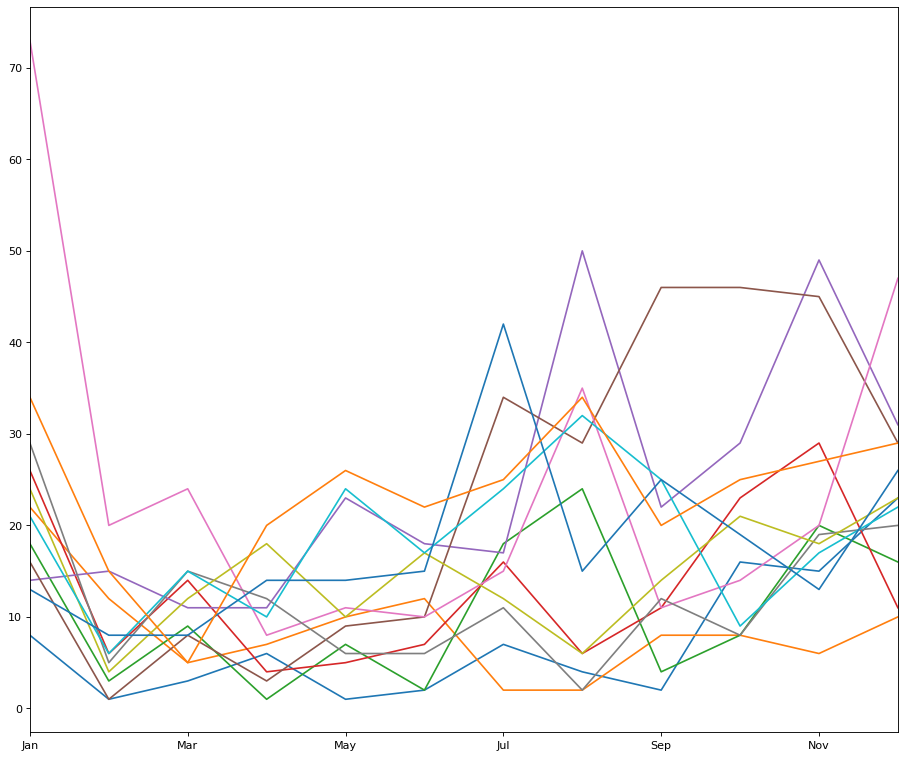

In [460]:
data_format_1 = time_data[(time_data["Year"].str.contains("2003"))
|(time_data["Year"].str.contains("2004"))
|(time_data["Year"].str.contains("2005"))
|(time_data["Year"].str.contains("2006"))
|(time_data["Year"].str.contains("2007"))
|(time_data["Year"].str.contains("2008"))
|(time_data["Year"].str.contains("2009"))
|(time_data["Year"].str.contains("2010"))
|(time_data["Year"].str.contains("2011"))
|(time_data["Year"].str.contains("2012"))
|(time_data["Year"].str.contains("2013"))
|(time_data["Year"].str.contains("2014"))
|(time_data["Year"].str.contains("2015"))
|(time_data["Year"].str.contains("2016"))
|(time_data["Year"].str.contains("2017"))
|(time_data["Year"].str.contains("2018"))
|(time_data["Year"].str.contains("2019"))]


# data_format_2 = data_format_1.pivot_table(index = 'Year', columns = 'Month', aggfunc = 'count')

data_format_3 = data_format_2[[('Temp',  1),
                                ('Temp',  2),
                                ('Temp',  3),
                                ('Temp',  4),
                                ('Temp',  5),
                                ('Temp',  6),
                                ('Temp',  7),
                                ('Temp',  8),
                                ('Temp',  9),
                                ('Temp', 10),
                                ('Temp', 11),
                                ('Temp', 12),]].reset_index()

year = [data_format_3.iloc[value].values[0] for value in range(1, len(data_format_3.columns))]
Jan = [data_format_3.iloc[value].values[1] for value in range(1, len(data_format_3.columns))]
Feb = [data_format_3.iloc[value].values[2] for value in range(1, len(data_format_3.columns))]
Mar = [data_format_3.iloc[value].values[3] for value in range(1, len(data_format_3.columns))]
Apr = [data_format_3.iloc[value].values[4] for value in range(1, len(data_format_3.columns))]
May = [data_format_3.iloc[value].values[5] for value in range(1, len(data_format_3.columns))]
Jun = [data_format_3.iloc[value].values[6] for value in range(1, len(data_format_3.columns))]
Jul = [data_format_3.iloc[value].values[7] for value in range(1, len(data_format_3.columns))]
Aug = [data_format_3.iloc[value].values[8] for value in range(1, len(data_format_3.columns))]
Sep = [data_format_3.iloc[value].values[9] for value in range(1, len(data_format_3.columns))]
Oct = [data_format_3.iloc[value].values[10] for value in range(1, len(data_format_3.columns))]
Nov = [data_format_3.iloc[value].values[11] for value in range(1, len(data_format_3.columns))]
Dec = [data_format_3.iloc[value].values[12] for value in range(1, len(data_format_3.columns))]


data_format_4 = pd.DataFrame({
    'Year': year,
    'Jan' : Jan,
    'Feb' : Feb,
    'Mar' : Mar,
    'Apr' : Apr,
    'May' : May,
    'Jun' : Jun,
    'Jul' : Jul,
    'Aug' : Aug,
    'Sep' : Sep,
    'Oct' : Oct,
    'Nov' : Nov,
    'Dec' : Dec
}).set_index('Year')

plt.figure(figsize=(14,12), dpi= 80)
data_format_4.iloc[0].plot(kind = 'line')
data_format_4.iloc[1].plot(kind = 'line')
data_format_4.iloc[2].plot(kind = 'line')
data_format_4.iloc[3].plot(kind = 'line')
data_format_4.iloc[4].plot(kind = 'line')
data_format_4.iloc[5].plot(kind = 'line')
data_format_4.iloc[6].plot(kind = 'line')
data_format_4.iloc[7].plot(kind = 'line')
data_format_4.iloc[8].plot(kind = 'line')
data_format_4.iloc[9].plot(kind = 'line')
data_format_4.iloc[10].plot(kind = 'line')
data_format_4.iloc[11].plot(kind = 'line')

### <strong>Is there overlap between the observers in the two datasets (i.e., are any wildlife officials also using iNaturalist)? (Hint: yes. Visualize it.)</strong>

In [220]:
inaturalist_data = pd.read_csv('Inaturalist_data.csv')

In [222]:
inaturalist_data['user.name'] = np.where(
    inaturalist_data['user.name'].isnull(),
    'None',
    inaturalist_data['user.name']
)

In [223]:
inaturalist_data['First_Name'] = inaturalist_data['user.name'].apply(lambda x: re.sub(' [A-Z].*','',x).strip())
inaturalist_data['Last_Name'] = inaturalist_data['user.name'].apply(lambda x: re.sub('^[A-Z]\w+ ','',x).strip())
inaturalist_data['Last_Name'] = np.where(
            inaturalist_data['Last_Name'] == inaturalist_data['First_Name'],
            'None',
            inaturalist_data['Last_Name']
)

inaturalist_data = inaturalist_data.rename(columns={'observed_on_details.date':'Date_Formatted'})

In [274]:
pd.set_option("display.max_rows", 5000)
merged = data[['First_Name', 'Last_Name', 'Date_Formatted']].merge(inaturalist_data[['First_Name', 'Last_Name','Date_Formatted']], on = 'First_Name', how = 'inner')

merged['Name_Match'] = np.where(
    merged['Last_Name_x'] == merged['Last_Name_y'],
    'True',
        (np.where(
        merged['Last_Name_y'] == 'None',
            'Maybe',
            'False'
        )
    )
)

merged['Last_Name_y'] = np.where(
    merged['First_Name'] == 'Michiko',
    'Squires',
    merged['Last_Name_y']
)


In [273]:
fwcc_merged = list(merged['First_Name'] + ' ' + merged['Last_Name_x'])
fwcc_data_names = (data['First_Name'] + ' ' + data['Last_Name'])

for name in fwcc_data_names:
    if name not in fwcc_merged:
        fwcc_merged.append(name)


In [261]:
i_merged = list(merged['First_Name'] + ' ' + merged['Last_Name_y'])
inaturalist_data_names = (inaturalist_data['First_Name'] + ' ' + inaturalist_data['Last_Name'])

for name in inaturalist_data_names:
    if name not in i_merged:
        i_merged.append(name)

In [ ]:
matching_officials = [name for name in set(fwcc_merged) if name in i_merged]

print('Officials in both datasets:')
for official in matching_officials:
    print("\n",official)

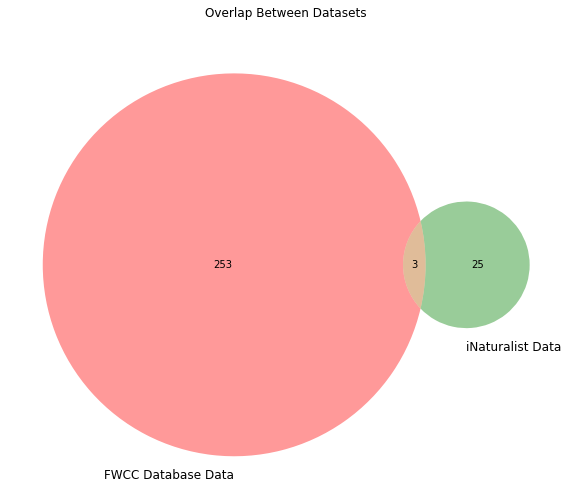

In [272]:
plt.figure(3,figsize=(10,10))
plt.title('Overlap Between Datasets\n')

venn2([set(fwcc_merged), set(i_merged)], 
      set_labels = ('FWCC Database Data', 'iNaturalist Data')
     )

## Officials in both datasets:

 - Hunter Howell

 - Michiko Squires

 - Joshua Sands